In [1]:
from utils import crop_roi, plot_image_grid
from dataloaders import create_dataloaders
import numpy as np
import torch

In [2]:
resnet_mean = torch.tensor([0.485, 0.456, 0.406])
resnet_std =  torch.tensor([0.229, 0.224, 0.225])
train_loader, val_loader, test_loader = create_dataloaders(normalize=True, limit=500, mean=resnet_mean, std=resnet_std)

--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 251 images.
--Data Balance-- The second common class is 2 with 49 images with a difference of 202 images from the most common class.
--Data Balance (Undersampling)-- Removing 125 from 0 class..
--Data Balance (Undersampling)-- 0 now has 125 images
-- Data Balance (Oversampling) -- Adding 103 from 1 class..
-- Data Balance (Oversampling) -- Adding 76 from 2 class..
-- Data Balance (Oversampling) -- Adding 76 from 3 class..
-- Data Balance (Oversampling) -- Adding 109 from 4 class..
-- Data Balance (Oversampling) -- Adding 119 from 5 class..
-- Data Balance (Oversampling) -- Adding 118 from 6 class..


Loading images: 875it [00:14, 61.12it/s]


---Data Loader--- Images uploaded: 875
Loading complete, some files (0) were not found: []


Loading images: 100it [00:01, 56.26it/s]


---Data Loader--- Images uploaded: 100
Loading complete, some files (0) were not found: []


Loading images: 500it [00:06, 76.67it/s]


---Data Loader--- Images uploaded: 499
Loading complete, some files (1) were not found: ['data/HAM10000_images_test/ISIC_0035068.jpg']


Images shape is torch.Size([64, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


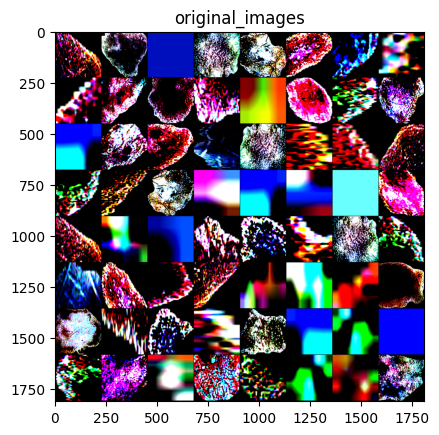

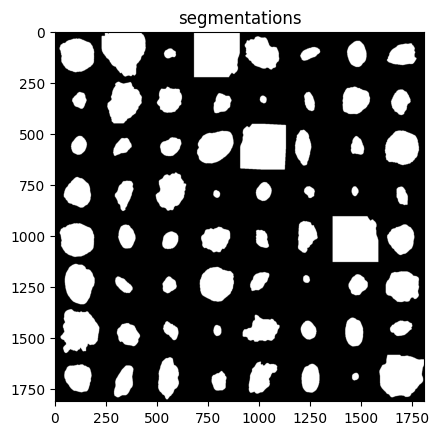

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


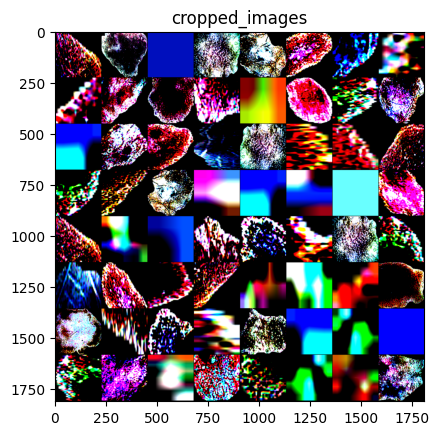

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Images shape is torch.Size([64, 3, 224, 224])


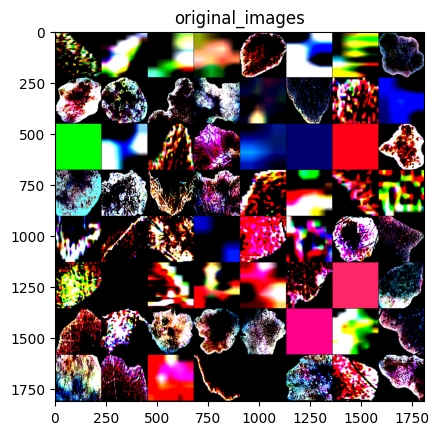

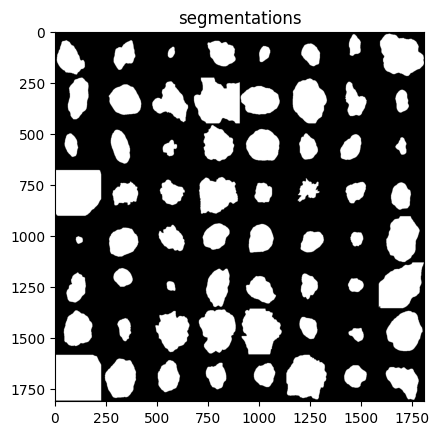

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


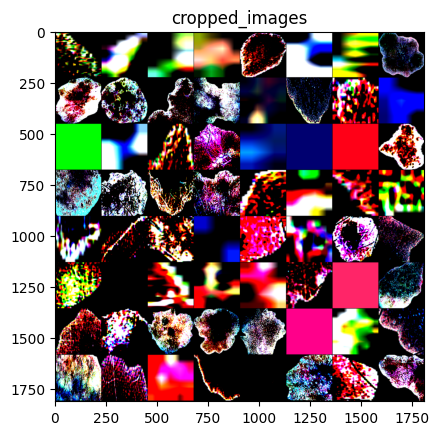

In [3]:
for tr_i, (tr_images, tr_labels, segmentations) in enumerate(train_loader):
    tr_images = torch.mul(tr_images, segmentations)
    print(f"Images shape is {tr_images.shape}")
    tr_images = crop_roi(tr_images)
    plot_image_grid(tr_images, "original_images")
    plot_image_grid(segmentations, "segmentations")
    plot_image_grid(tr_images, "cropped_images")
    break
for val_i, (val_images, val_labels, segmentations) in enumerate(val_loader):
    val_images = torch.mul(val_images, segmentations)
    print(f"Images shape is {val_images.shape}")
    val_images = crop_roi(val_images)
    plot_image_grid(val_images, "original_images")
    plot_image_grid(segmentations, "segmentations")
    plot_image_grid(val_images, "cropped_images")
    break